Number of hashtag records: 12707
Unique hashtags: 3946


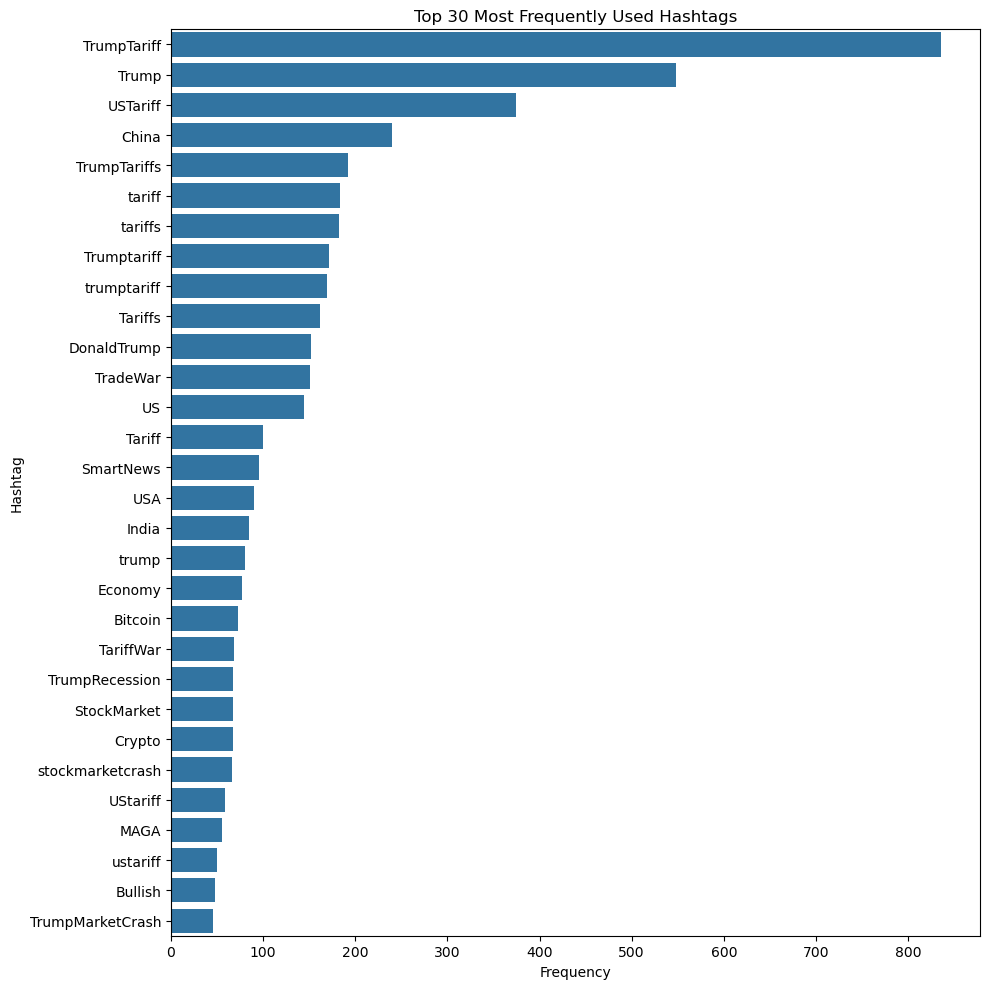

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load tables
posts = pd.read_csv("posts_table.csv")
users = pd.read_csv("users_table.csv")
hashtags = pd.read_csv("hashtags_table.csv") 

# Content overview
# Check quick overview
print("Number of hashtag records:", len(hashtags))
print("Unique hashtags:", hashtags['hashtag'].nunique())

# Count frequency of hashtags
hashtag_counts = hashtags['hashtag'].value_counts().reset_index()
hashtag_counts.columns = ['hashtag', 'count']

# Display top 30 hashtags
top_n = 30
top_hashtags = hashtag_counts.head(top_n)

# Plot
plt.figure(figsize=(10,10))
sns.barplot(data=top_hashtags, x="count", y="hashtag")
plt.title(f"Top {top_n} Most Frequently Used Hashtags")
plt.xlabel("Frequency")
plt.ylabel("Hashtag")
plt.tight_layout()
plt.show()

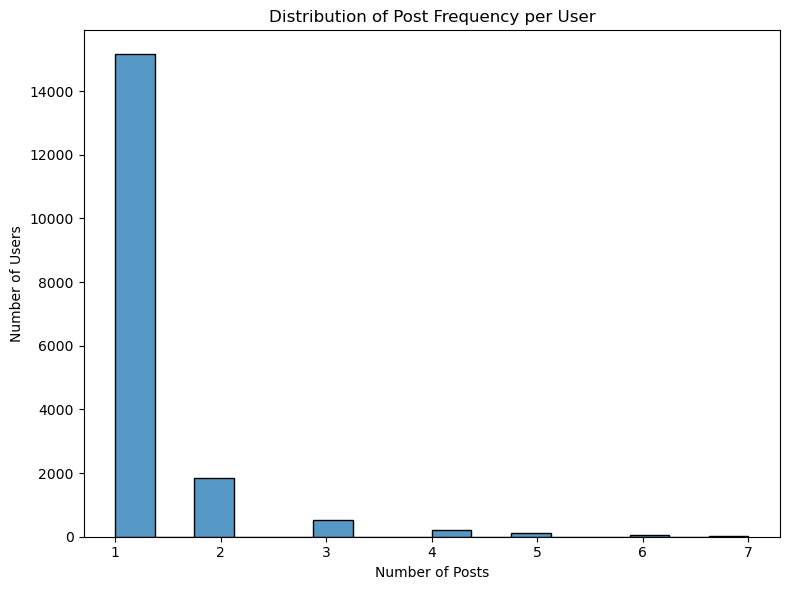

In [8]:
# Distribution of post frequency per user
user_post_counts = posts['user_id'].value_counts()

plt.figure(figsize=(8,6))
sns.histplot(user_post_counts, kde=False)
plt.title("Distribution of Post Frequency per User")
plt.xlabel("Number of Posts")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

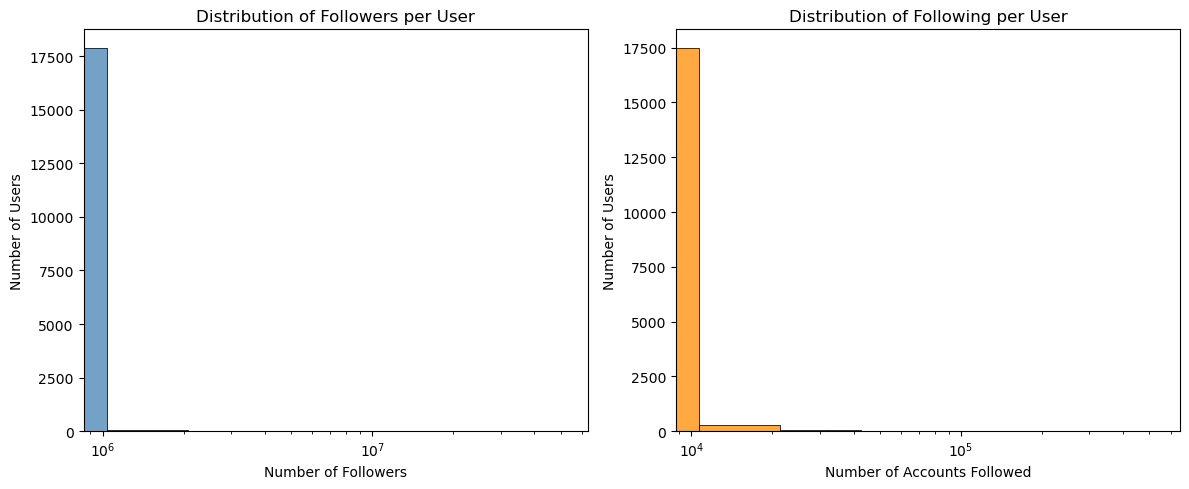

In [9]:
plt.figure(figsize=(12,5))

# Followers histogram (left)
plt.subplot(1,2,1)
sns.histplot(users['followers'], bins=50, kde=False, color="steelblue")
plt.title("Distribution of Followers per User")
plt.xlabel("Number of Followers")
plt.ylabel("Number of Users")
plt.xscale("log")

# Following histogram (right)
plt.subplot(1,2,2)
sns.histplot(users['following'], bins=50, kde=False, color="darkorange")
plt.title("Distribution of Following per User")
plt.xlabel("Number of Accounts Followed")
plt.ylabel("Number of Users")
plt.xscale("log")

plt.tight_layout()
plt.show()

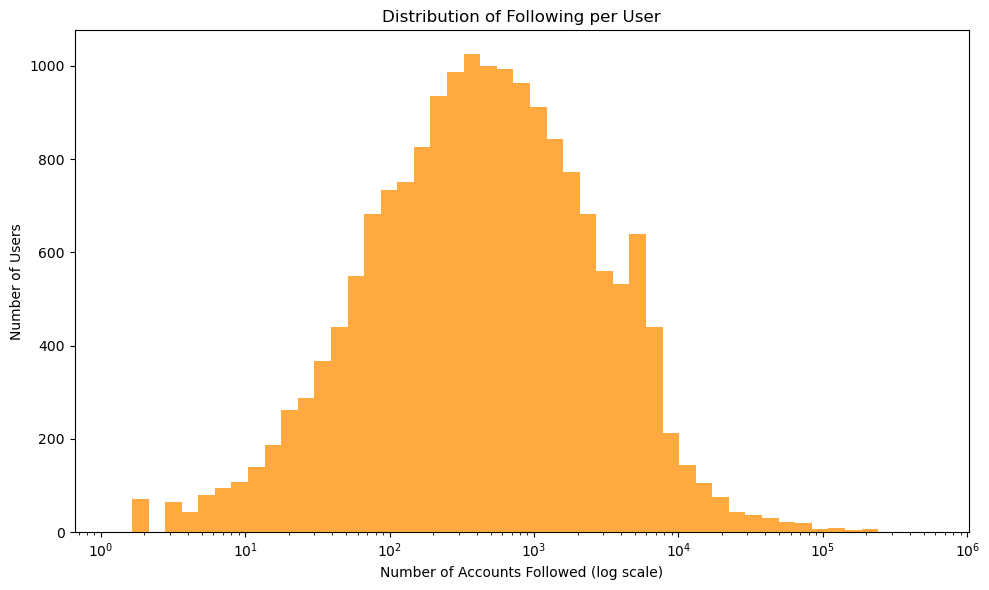

In [10]:
import numpy as np

# Following histogram (log bins)
plt.figure(figsize=(10,6))
bins = np.logspace(0.1, np.log10(users['following'].max()), 50)
sns.histplot(users['following'], bins=bins, color="darkorange")
plt.title("Distribution of Following per User")
plt.xlabel("Number of Accounts Followed (log scale)")
plt.ylabel("Number of Users")
plt.xscale("log")

plt.tight_layout()
plt.show()

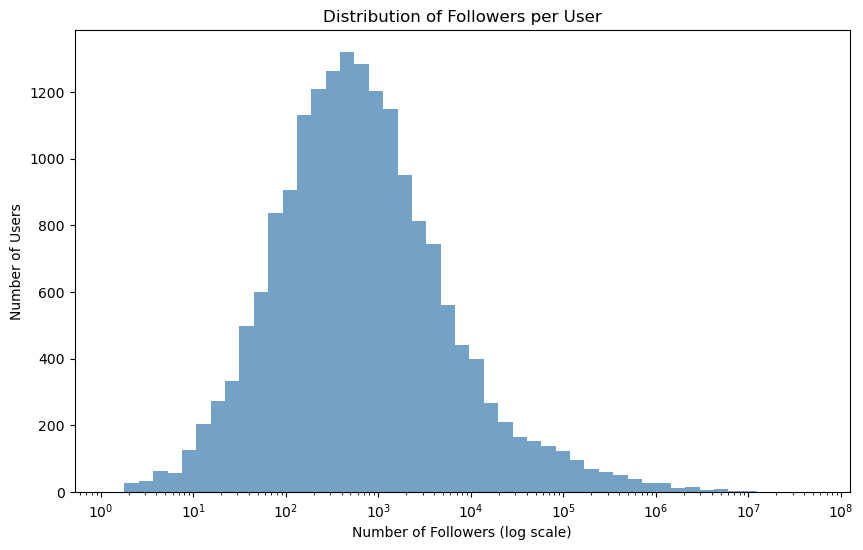

In [11]:
# 2. Histogram of follower counts
plt.figure(figsize=(10,6))
bins = np.logspace(0.1, np.log10(users['followers'].max()), 50)
sns.histplot(users['followers'], bins=bins, color="steelblue")
plt.title("Distribution of Followers per User")
plt.xlabel("Number of Followers (log scale)")
plt.ylabel("Number of Users")
plt.xscale("log")

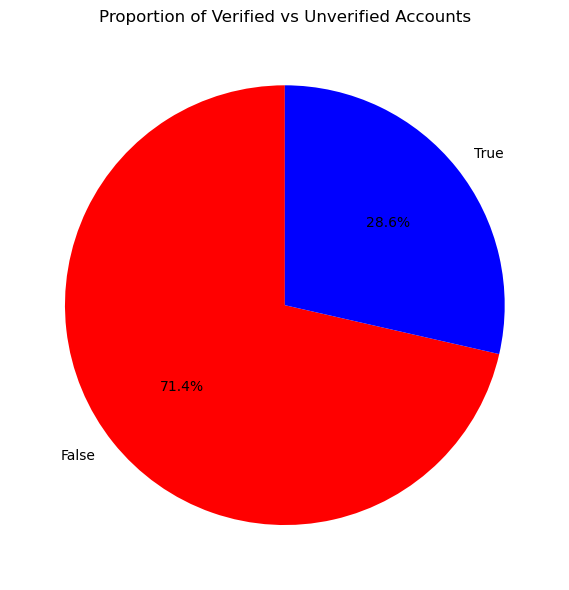

In [12]:
# Pie chart of verified vs unverified accounts
verified_counts = users['verified'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    verified_counts,
    labels=["Unverified", "Verified"] if 0 in verified_counts.index else verified_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["red", "blue"]
)
plt.title("Proportion of Verified vs Unverified Accounts")
plt.tight_layout()
plt.show()